# Selección de Países e indicadores proyecto <span style="color:green">Esperanza de Vida al Nacer</span>
### Base de Datos Banco Mundial - UNESCO

In [1]:
# Carga de módulos necesarios
import wbgapi as wb
import pandas as pd
import numpy as np

pd.options.display.max_columns = None

## Revisión de Bases de Datos
En ésta primera parte se realiza una consulta general de las bases de datos existentes en la data del Banco Mundial y una busqueda por palabra clave que sea reprensetativa de los objetivos planteados en los enunciados del proyecto.

In [2]:
# Bases de datos existentes 
wb.source.info()

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2023-09-15
3,Worldwide Governance Indicators,WGI,3,2022-09-23
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2022-12-06
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2020-12-20
13,Enterprise Surveys,ESY,3,2022-03-25
14,Gender Statistics,GDS,3,2023-07-24
15,Global Economic Monitor,GEM,3,2023-07-21


### Objetivo # 1
`La edad` de la persona al momento de adquirir el seguro de vida debe rondar el 50% de la expectativa de vida para esa población; de esta manera la aseguradora tendrá clientes durante un periodo de tiempo más extenso y con ello más ganancia.
1. Life expectancy at birth

In [3]:
# Consulta por expectativa (expectancy)
wb.series.info(q=('expectancy'))

id,value
SP.DYN.LE00.FE.IN,"Life expectancy at birth, female (years)"
SP.DYN.LE00.IN,"Life expectancy at birth, total (years)"
SP.DYN.LE00.MA.IN,"Life expectancy at birth, male (years)"
,3 elements


### Objetivo # 2
`Accesibilidad a la educación`, mientras más acceso a la educación tenga la población mayor será la facilidad de adquisición de un seguro de vida, si el 70% de la población tiene acceso a la educación universitaria, mayor será la probabilidad de que adquieran un seguro de vida.

In [4]:
# Consulta por alfabetización
wb.series.info(q=('literacy'))

id,value
SE.ADT.1524.LT.FE.ZS,"Literacy rate, youth female (% of females ages 15-24)"
SE.ADT.1524.LT.FM.ZS,"Literacy rate, youth (ages 15-24), gender parity index (GPI)"
SE.ADT.1524.LT.MA.ZS,"Literacy rate, youth male (% of males ages 15-24)"
SE.ADT.1524.LT.ZS,"Literacy rate, youth total (% of people ages 15-24)"
SE.ADT.LITR.FE.ZS,"Literacy rate, adult female (% of females ages 15 and above)"
SE.ADT.LITR.MA.ZS,"Literacy rate, adult male (% of males ages 15 and above)"
SE.ADT.LITR.ZS,"Literacy rate, adult total (% of people ages 15 and above)"
,7 elements


In [5]:
# Consulta por Educación (education)
wb.series.info(db=12, q=('tertiary'))

id,value
BAR.TER.CMPT.1519.FE.ZS,Barro-Lee: Percentage of female population age 15-19 with tertiary schooling. Completed Tertiary
BAR.TER.CMPT.1519.ZS,Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Completed Tertiary
BAR.TER.CMPT.15UP.FE.ZS,Barro-Lee: Percentage of female population age 15+ with tertiary schooling. Completed Tertiary
BAR.TER.CMPT.15UP.ZS,Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary
BAR.TER.CMPT.2024.FE.ZS,Barro-Lee: Percentage of female population age 20-24 with tertiary schooling. Completed Tertiary
BAR.TER.CMPT.2024.ZS,Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Completed Tertiary
BAR.TER.CMPT.2529.FE.ZS,Barro-Lee: Percentage of female population age 25-29 with tertiary schooling. Completed Tertiary
BAR.TER.CMPT.2529.ZS,Barro-Lee: Percentage of population age 25-29 with tertiary schooling. Completed Tertiary
BAR.TER.CMPT.25UP.FE.ZS,Barro-Lee: Percentage of female population age 25+ with tertiary schooling. Completed Tertiary
BAR.TER.CMPT.25UP.ZS,Barro-Lee: Percentage of population age 25+ with tertiary schooling. Completed Tertiary


In [6]:
wb.series.info(db=12, q=('Learning poverty'))

id,value
SE.LPV.PRIM,Learning poverty: Share of Children at the End-of-Primary age below minimum reading proficiency adjusted by Out-of-School Children (%)
SE.LPV.PRIM.FE,Learning poverty: Share of Female Children at the End-of-Primary age below minimum reading proficiency adjusted by Out-of-School Children (%)
SE.LPV.PRIM.MA,Learning poverty: Share of Male Children at the End-of-Primary age below minimum reading proficiency adjusted by Out-of-School Children (%)
,3 elements


In [7]:
wb.series.info(db=12, q=('access'))

id,value
SABER.EMIS.GOAL4.LVL3,SABER: (Education Management Information Systems) Policy Goal 4 Lever 3: Accessibility
UIS.SCHBSP.1.WCOMPUT,Proportion of primary schools with access to computers for pedagogical purposes (%)
UIS.SCHBSP.1.WELEC,Proportion of primary schools with access to electricity (%)
UIS.SCHBSP.1.WINFSTUDIS,Proportion of primary schools with access to adapted infrastructure and materials for students with disabilities (%)
UIS.SCHBSP.1.WINTERN,Proportion of primary schools with access to Internet for pedagogical purposes (%)
UIS.SCHBSP.1.WWATA,Proportion of primary schools with access to basic drinking water (%)
UIS.SCHBSP.2.WCOMPUT,Proportion of lower secondary schools with access to computers for pedagogical purposes (%)
UIS.SCHBSP.2.WELEC,Proportion of lower secondary schools with access to electricity (%)
UIS.SCHBSP.2.WINFSTUDIS,Proportion of lower secondary schools with access to adapted infrastructure and materials for students with disabilities (%)
UIS.SCHBSP.2.WINTERN,Proportion of lower secondary schools with access to Internet for pedagogical purposes (%)


### Objetivo # 3
En países donde la `inflación` está sobre el 10% mensual son países NO aptos para inversión, ya que su población tiene, quizá, otras prioridades en las cuales ¨invertir¨.

In [8]:
# Consulta por inflación (inflation)
wb.series.info(q=('inflation'))

id,value
FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)"
NY.GDP.DEFL.KD.ZG,"Inflation, GDP deflator (annual %)"
NY.GDP.DEFL.KD.ZG.AD,"Inflation, GDP deflator: linked series (annual %)"
,3 elements


### Objetivo # 4
Determinar la influencia del índice `Gini` en la esperanza de vida en cada país. El índice Gini mide la desigualdad de ingresos en una sociedad. Entre mayor desigualdad, mayor será el índice Gini, dependiendo de este índice, podemos definir que porcentaje de la población de los países tienen la facilidad de acceder a un seguro de vida, (Tomese en cuenta género, raza, cultura).

In [9]:
wb.series.info(q=('gini'))

id,value
SI.POV.GINI,Gini index
,1 elements


### Otros indicadores útiles 

In [10]:
# Consulta por PIB per capital (gdp per capita)
wb.series.info(q=('gdp per capita'))

id,value
NY.GDP.PCAP.CD,GDP per capita (current US$)
NY.GDP.PCAP.CN,GDP per capita (current LCU)
NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$)
NY.GDP.PCAP.KD.ZG,GDP per capita growth (annual %)
NY.GDP.PCAP.KN,GDP per capita (constant LCU)
NY.GDP.PCAP.PP.CD,"GDP per capita, PPP (current international $)"
NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 international $)"
,7 elements


In [11]:
# Consulta por salud (health)
wb.series.info(q=('health'))

id,value
SG.DMK.ALLD.FN.ZS,"Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)"
SG.DMK.SRCR.FN.ZS,"Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15-49)"
SH.MED.CMHW.P3,"Community health workers (per 1,000 people)"
SH.STA.BRTC.ZS,Births attended by skilled health staff (% of total)
SH.UHC.FBP1.ZS,Proportion of population pushed further below the $2.15 ($ 2017 PPP) poverty line by out-of-pocket health care expenditure (%)
SH.UHC.FBP2.ZS,Proportion of population pushed further below the $3.65 ($ 2017 PPP) poverty line by out-of-pocket health care expenditure (%)
SH.UHC.FBPR.ZS,Proportion of population pushed further below the 60% median consumption poverty line by out-of-pocket health care expenditure (%)
SH.UHC.NOP1.ZS,Proportion of population pushed below the $2.15 ($ 2017 PPP) poverty line by out-of-pocket health care expenditure (%)
SH.UHC.NOP2.ZS,Proportion of population pushed below the $3.65 ($ 2017 PPP) poverty line by out-of-pocket health care expenditure (%)
SH.UHC.NOPR.ZS,Proportion of population pushed below the 60% median consumption poverty line by out-of-pocket health expenditure (%)


In [12]:
wb.series.info(q=('injury'))

id,value
SH.DTH.INJR.ZS,"Cause of death, by injury (% of total)"
SH.STA.TRAF.P5,"Mortality caused by road traffic injury (per 100,000 population)"
,2 elements


In [13]:
wb.series.info(q=('Hospital beds'))

id,value
SH.MED.BEDS.ZS,"Hospital beds (per 1,000 people)"
,1 elements


In [14]:
wb.series.info(db=86)

id,value
JI.AGE.MPYR,"Average age of employers, aged 15-64, total"
JI.AGE.MPYR.FE,"Average age of employers, aged 15-64, female"
JI.AGE.MPYR.HE,"Average age of employers, aged 15-64, above primary education"
JI.AGE.MPYR.LE,"Average age of employers, aged 15-64, primary education and below"
JI.AGE.MPYR.MA,"Average age of employers, aged 15-64, male"
JI.AGE.MPYR.OL,"Average age of employers, aged 25-64"
JI.AGE.MPYR.RU,"Average age of employers, aged 15-64, rural"
JI.AGE.MPYR.UR,"Average age of employers, aged 15-64, urban"
JI.AGE.MPYR.YG,"Average age of employers, aged 15-24"
JI.AGE.SELF,"Average age of self-employed or unpaid workers, aged 15-64, total"


## Países a evaluar

In [15]:
# Crear listado de Países (economy) que se encuentran en la Base de Datos
countries = wb.economy.list()
countries_df = pd.DataFrame(countries)

```python
countries_list = ['CHN', 'RUS', 'PHL', 'IND', 'PRK', 'KOR', 'IRQ', 'ZAF', 'CIV',
                  'VEN', 'ARG', 'AUS', 'BRA', 'BOL', 'CHL', 'CUB', 'CAN', 'COL', 'USA',
                  'ECU', 'GTM', 'HND', 'HTI', 'MEX', 'NIC', 'PER', 'SLV', 'URY', 'PRY',
                  'ESP', 'DOM', 'SWE', 'CHE', 'GBR', 'PRT', 'HRV', 'JPN', 'NGA', 'EGY',
                  'TCD', 'SUR', 'MAR', 'GND', 'SOM', 'KHM', 'LBY', 'AUS', 'ITA', 'DEU',
                  'FRA', 'NOR', 'LUX',
                 ]
```

In [16]:
countries_list = ['CHN', 'RUS', 'PHL', 'IND', 'KOR', 'ZAF', 
                  'VEN', 'ARG', 'AUS', 'BRA', 'BOL', 'CHL', 
                  'ECU', 'MEX', 'PER', 'SLV', 'URY', 'PRY',
                  'ESP', 'SWE', 'CHE', 'GBR', 'PRT', 'JPN', 
                  'LBY', 'ITA', 'DEU', 'FRA', 'NOR', 'LUX',
                  'CAN', 'COL', 'USA', 'EGY'
                 ]

In [17]:
# Generar Data Frame de los 34 paises a estudiar
countries_df = countries_df[countries_df['id'].isin(countries_list)][['id', 'value', 'longitude', 'latitude', 'region', 'lendingType', 'incomeLevel', 'capitalCity']]
countries_df

,id,value,longitude,latitude,region,lendingType,incomeLevel,capitalCity
9,ARG,Argentina,-58.417300,-34.611800,LCN,IBD,UMC,Buenos Aires
13,AUS,Australia,149.129000,-35.282000,EAS,LNX,HIC,Canberra
28,BOL,Bolivia,-66.193600,-13.990800,LCN,IBD,LMC,La Paz
29,BRA,Brazil,-47.929200,-15.780100,LCN,IBD,UMC,Brasilia
35,CAN,Canada,-75.691900,45.421500,NAC,LNX,HIC,Ottawa
37,CHE,Switzerland,7.448210,46.948000,ECS,LNX,HIC,Bern
39,CHL,Chile,-70.647500,-33.475000,LCN,IBD,HIC,Santiago
40,CHN,China,116.286000,40.049500,EAS,IBD,UMC,Beijing
45,COL,Colombia,-74.082000,4.609870,LCN,IBD,UMC,Bogota
55,DEU,Germany,13.411500,52.523500,ECS,LNX,HIC,Berlin


## Descripción de columnas data frame
#### id
Código País según ISO 3166-1 alfa-3.
#### value
Nombre común del país o territorio comúnmente usado.
#### longitude
Medida que en cartografía expresa la distancia angular entre un punto dado de la superficie terrestre y el meridiano que se toma como 0°.
#### latitude
Distancia angular entre la línea ecuatorial (el ecuador) y un punto determinado de la Tierra, medida a lo largo del meridiano en el que se encuentra dicho punto.
#### region
Código de la región geográfica en la que se encuentra el país o territorio.
#### Lending Type
**IBD**: Préstamos respaldados por hipotecas (MBS) que se consideran de alto riesgo. Los MBS son valores que están respaldados por una cartera de hipotecas. Los MBS IBD suelen tener un mayor riesgo de incumplimiento que los MBS tradicionales debido a la calidad de las hipotecas subyacentes.<br>
**LNX**: Préstamos comerciales apalancados (LBO) que se consideran de alto riesgo. Los LBO son préstamos que se utilizan para financiar la adquisición de una empresa por parte de otra empresa. Los LBO suelen tener un mayor riesgo de incumplimiento que los préstamos comerciales tradicionales debido al alto nivel de apalancamiento involucrado.<br>
**IDX**: Préstamos estructurados que se consideran de alto riesgo. Los préstamos estructurados son préstamos que se han dividido en diferentes tramos de riesgo. Los tramos de mayor riesgo de los préstamos estructurados suelen tener un mayor riesgo de incumplimiento que los préstamos tradicionales.
#### Income Level
**HIC**: High income: Países de altos ingresos. El PIB per cápita de estos países es superior a 12.616 dólares.<br>
**UMC**: Upper Middle income: Países de ingresos medios altos. El PIB per cápita de estos países está entre 4.036 y 12.615 dólares.<br>
**LMC**: Lower Middle income: Países de ingresos medios bajos. El PIB per cápita de estos países está entre 1.036 y 4.035 dólares.<br>
**LIC**: Low income: Países de bajos ingresos. El PIB per cápita de estos países es inferior a 1.035 dólares.<br>
**INX**: Sin Información<br>
#### capitalCity
Ciudad capital de la región o territorio.

In [18]:
# Diccionario de indicadores
indicators =  {
                'SP.DYN.LE00.FE.IN': 'Life expectancy at birth, female (years)',
                'SP.DYN.LE00.IN': 'Life expectancy at birth, total (years)',
                'SP.DYN.LE00.MA.IN': 'Life expectancy at birth, male (years)',
                'SP.URB.TOTL.IN.ZS': 'Urban population (% of total population)',
                'SP.RUR.TOTL.ZS': 'Rural population (% of total population)',
                'SP.POP.GROW':'Population growth (annual %)',
                'FP.CPI.TOTL.ZG': 'Inflation, consumer prices (annual %)',
                'SI.POV.GINI': 'Gini index',
                'NY.GDP.DEFL.KD.ZG': 'Inflation, GDP deflator (annual %)',
                'NY.GDP.MKTP.CD': 'GDP (current US$)',
                'NY.GDP.PCAP.CD': 'GDP per capita (current US$)',
                'NY.GDP.PCAP.KD.ZG': 'GDP per capita growth (annual %)',
                'NY.GNP.MKTP.CD': 'GNI (current US$)',
                'SH.XPD.CHEX.GD.ZS': 'Current health expenditure (% of GDP)',
                'SH.MED.BEDS.ZS': 'Hospital beds (per 1,000 people)',
                'SH.XPD.PVTD.PC.CD': 'Domestic private health expenditure per capita (current US$)',
                'SH.XPD.CHEX.PC.CD': 'Current health expenditure per capita (current US$)',
                'SH.STA.TRAF.P5': 'Mortality caused by road traffic injury (per 100,000 population)',
                'SH.STA.BASS.ZS': 'People using at least basic sanitation services (% of population)',
                'SH.H2O.SMDW.ZS': 'People using safely managed drinking water services (% of population)',
                'SE.ADT.LITR.ZS': 'Literacy rate, adult total (% of people ages 15 and above)',
                'CC.EST': 'Control of Corruption: Estimate',
                'MS.MIL.XPND.GD.ZS': 'Military expenditure (% of GDP)',
                'NE.CON.GOVT.CD':'General government final consumption expenditure (current US$)',
                'EG.ELC.ACCS.ZS': 'Access to electricity (% of population)',
                'TX.VAL.FOOD.ZS.UN':'Food exports (% of merchandise exports)',
                'AG.PRD.FOOD.XD':'Food production index (2014-2016 = 100)',
                'NE.CON.PRVT.ZS': 'Households and NPISHs final consumption expenditure (% of GDP)',
                'SE.ENR.TERT.FM.ZS': 'School enrollment, tertiary (gross), gender parity index (GPI)',
                'SE.TER.ENRR': 'School enrollment, tertiary (% gross)',
                }

countries = countries_df['id'].tolist()

In [19]:
def crerate_df_bm(indicators, countries):
    '''
    Construir Data Frame con información del World Bank.

     Args:
         indicators: Lista de diccionarios con los códigos y nombres de indicadores
         countries: Lista con los códigos de los paises según ISO 3166-1 
       
     Returns:
         Data Frame 
    '''
    # Crear array vacio
    data = np.array([])
    # Buscar a través de la lista de indicadores y obtener los datos
    for i in indicators.items():
        trans_data = wb.data.fetch(i[0], countries)
        list_countries = []
        list_years = []
        list_data = []
        # Se agregan los valores obtenidos a cada lista auxiliar y se crea diccionario con estas
        for x in trans_data:
            list_countries.append(x['economy'])
            list_years.append((x['time'][2::]))
            list_data.append((x['value']))
        data_dict = {'name':i[1],
                'country':list_countries,
                'year':list_years,
                'value':list_data
              }
        # Se Agregan data_dict al array data
        data = np.append(data, data_dict)
        
    # Construcción del data frame    
    df = pd.DataFrame()
    df['country'] = data[0]['country'] 
    df['year'] = data[0]['year'] 
    for i in range(0,len(data)):
        df[data[i]['name']] = data[i]['value']
        
    return df

In [20]:
df = crerate_df_bm(indicators, countries)
df

,country,year,"Life expectancy at birth, female (years)","Life expectancy at birth, total (years)","Life expectancy at birth, male (years)",Urban population (% of total population),Rural population (% of total population),Population growth (annual %),"Inflation, consumer prices (annual %)",Gini index,"Inflation, GDP deflator (annual %)",GDP (current US$),GDP per capita (current US$),GDP per capita growth (annual %),GNI (current US$),Current health expenditure (% of GDP),"Hospital beds (per 1,000 people)",Domestic private health expenditure per capita (current US$),Current health expenditure per capita (current US$),"Mortality caused by road traffic injury (per 100,000 population)",People using at least basic sanitation services (% of population),People using safely managed drinking water services (% of population),"Literacy rate, adult total (% of people ages 15 and above)",Control of Corruption: Estimate,Military expenditure (% of GDP),General government final consumption expenditure (current US$),Access to electricity (% of population),Food exports (% of merchandise exports),Food production index (2014-2016 = 100),Households and NPISHs final consumption expenditure (% of GDP),"School enrollment, tertiary (gross), gender parity index (GPI)","School enrollment, tertiary (% gross)"
0,ZAF,2022,NaN,NaN,NaN,68.335,31.665,0.841058,7.039727,NaN,5.054293,4.058697e+11,6776.480077,1.187663,3.974388e+11,NaN,NaN,NaN,NaN,NaN,77.634246,NaN,NaN,NaN,0.739894,7.949644e+10,NaN,10.392224,NaN,63.094095,NaN,NaN
1,ZAF,2021,64.999,62.341,59.458,67.847,32.153,0.998920,4.611672,NaN,6.219017,4.190156e+11,7055.055176,3.870315,4.109907e+11,NaN,NaN,NaN,NaN,NaN,76.890993,NaN,NaN,0.022103,0.809813,8.232470e+10,89.3,9.657360,114.31,61.674318,NaN,NaN
2,ZAF,2020,67.964,65.252,62.178,67.354,32.646,1.223179,3.210036,NaN,5.692615,3.376196e+11,5741.641249,-7.481093,3.319875e+11,8.583298,NaN,178.993024,489.643585,NaN,76.139455,NaN,NaN,-0.010780,0.957517,7.019953e+10,90.0,11.846560,111.39,62.524709,1.36051,24.23630
3,ZAF,2019,69.107,66.175,62.834,66.856,33.144,1.295074,4.120246,NaN,4.638081,3.885312e+11,6688.774746,-0.987175,3.788474e+11,8.242583,NaN,222.565061,550.480225,22.2,75.379645,NaN,95.022972,0.020065,0.884245,7.644400e+10,85.0,10.975456,104.54,63.931415,1.32861,23.86656
4,ZAF,2018,68.740,65.674,62.203,66.355,33.645,1.225530,4.517165,NaN,3.745754,4.041589e+11,7048.508112,0.285736,3.928701e+11,8.062900,NaN,236.952989,569.273682,22.7,74.611680,NaN,NaN,-0.112126,0.897196,7.845114e+10,84.7,11.109532,104.32,63.903014,1.31648,23.80196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,ARG,1964,68.261,64.363,61.037,75.844,24.156,1.599523,NaN,NaN,28.774617,2.560525e+10,1179.504098,8.382751,2.626786e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.150000,1.851010e+09,NaN,77.226652,33.65,68.671663,NaN,NaN
2138,ARG,1963,68.285,64.449,61.178,75.309,24.691,1.621661,NaN,NaN,25.591154,1.827212e+10,855.275656,-6.831393,1.874495e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680000,1.873294e+09,NaN,72.124154,36.20,71.761256,NaN,NaN
2139,ARG,1962,68.031,64.244,61.035,74.767,25.233,1.629282,NaN,NaN,28.871842,2.445060e+10,1163.186836,-2.454333,2.508341e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.660000,2.981109e+09,NaN,71.516722,33.20,67.053969,NaN,NaN
2140,ARG,1961,68.031,64.360,61.240,74.217,25.783,1.613029,NaN,NaN,20.310698,NaN,NaN,3.740903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.140000,NaN,NaN,NaN,31.41,62.311085,NaN,NaN


In [32]:
df.dtypes

country                                                                   object
year                                                                      object
Life expectancy at birth, female (years)                                 float64
Life expectancy at birth, total (years)                                  float64
Life expectancy at birth, male (years)                                   float64
Urban population (% of total population)                                 float64
Rural population (% of total population)                                 float64
Population growth (annual %)                                             float64
Inflation, consumer prices (annual %)                                    float64
Gini index                                                               float64
Inflation, GDP deflator (annual %)                                       float64
GDP (current US$)                                                        float64
GDP per capita (current US$)

In [33]:
# Cambiar tipo de datos de columna "year"
df['year'] = df['year'].astype('int')

In [34]:
# Eliminar filas donde el año (year) sea anterior a 1985
df.drop(df[(df['year'] < 1985)].index, inplace=True)

In [35]:
# Evaluar forma del data frame
print(f"Forma del DataFrame: {df.shape}")
print("Tipos de datos de las variables")
print('*'*100)
df.dtypes

Forma del DataFrame: (1292, 32)
Tipos de datos de las variables
****************************************************************************************************


country                                                                   object
year                                                                       int64
Life expectancy at birth, female (years)                                 float64
Life expectancy at birth, total (years)                                  float64
Life expectancy at birth, male (years)                                   float64
Urban population (% of total population)                                 float64
Rural population (% of total population)                                 float64
Population growth (annual %)                                             float64
Inflation, consumer prices (annual %)                                    float64
Gini index                                                               float64
Inflation, GDP deflator (annual %)                                       float64
GDP (current US$)                                                        float64
GDP per capita (current US$)

In [37]:
print("Estadísticos Básicos")
print('*'*100)
df.describe()

Estadísticos Básicos
****************************************************************************************************


,year,"Life expectancy at birth, female (years)","Life expectancy at birth, total (years)","Life expectancy at birth, male (years)",Urban population (% of total population),Rural population (% of total population),Population growth (annual %),"Inflation, consumer prices (annual %)",Gini index,"Inflation, GDP deflator (annual %)",GDP (current US$),GDP per capita (current US$),GDP per capita growth (annual %),GNI (current US$),Current health expenditure (% of GDP),"Hospital beds (per 1,000 people)",Domestic private health expenditure per capita (current US$),Current health expenditure per capita (current US$),"Mortality caused by road traffic injury (per 100,000 population)",People using at least basic sanitation services (% of population),People using safely managed drinking water services (% of population),"Literacy rate, adult total (% of people ages 15 and above)",Control of Corruption: Estimate,Military expenditure (% of GDP),General government final consumption expenditure (current US$),Access to electricity (% of population),Food exports (% of merchandise exports),Food production index (2014-2016 = 100),Households and NPISHs final consumption expenditure (% of GDP),"School enrollment, tertiary (gross), gender parity index (GPI)","School enrollment, tertiary (% gross)"
count,1292.000000,1258.000000,1258.000000,1258.000000,1292.000000,1292.000000,1292.000000,1204.000000,654.000000,1264.000000,1.276000e+03,1276.000000,1264.000000,1.244000e+03,715.000000,840.000000,711.000000,716.000000,680.000000,776.000000,522.000000,229.000000,782.000000,1258.000000,1.262000e+03,1033.000000,1164.000000,1236.000000,1262.000000,791.000000,916.000000
mean,2003.500000,77.114891,74.092205,71.179955,71.519505,28.480495,1.047089,37.764839,40.355963,41.579137,1.221914e+12,19255.318994,1.922377,1.255248e+12,7.666731,4.450701,708.829654,2217.982809,14.129412,89.018564,84.798859,91.942630,0.454540,1.988016,2.023827e+11,95.461446,16.094651,83.836739,60.153002,1.078374,44.558946
std,10.970102,6.270404,6.201257,6.298564,15.526056,15.526056,0.812230,433.608074,9.221253,430.313565,2.724510e+12,22601.258227,5.005409,2.783497e+12,2.684174,3.351371,1085.303478,2524.118328,8.051982,14.766638,19.784042,8.413598,1.140627,1.137450,4.104720e+11,8.956345,16.185179,20.865632,10.736981,0.228769,24.504660
min,1985.000000,54.734000,53.446000,50.876000,22.874000,4.312000,-5.280078,-9.797647,23.100000,-26.299993,3.282449e+09,251.811957,-47.899986,3.649842e+09,2.185637,0.410000,14.138995,18.448996,2.100000,14.085762,39.592657,44.423988,-1.605779,0.150854,2.192122e+08,49.811310,0.000000,26.110000,21.261028,0.408760,1.417282
25%,1994.000000,73.448500,70.297250,67.142250,63.642500,18.135750,0.476403,1.904489,32.900000,1.821850,7.113295e+10,3016.521254,0.447951,7.542276e+10,5.391213,2.117500,130.465206,292.730751,7.400000,83.574316,72.560528,90.920212,-0.517076,1.238108,9.678110e+09,95.894463,5.841733,68.805000,54.117287,0.963370,25.759627
50%,2003.500000,78.233000,74.885500,71.698500,75.826000,24.174000,1.015573,3.558011,38.500000,4.072852,3.186529e+11,9631.963823,1.984014,3.311050e+11,7.807299,3.585000,400.631693,885.629333,13.400000,95.531012,96.699998,94.020798,0.251377,1.809851,4.729795e+10,100.000000,10.270594,91.065000,60.976549,1.135920,40.197495
75%,2013.000000,81.760000,78.745122,76.000000,81.864250,36.357500,1.621532,7.878302,47.450000,8.732507,1.269471e+12,29592.331380,3.764599,1.284913e+12,9.415423,5.577500,799.874914,3794.402649,18.725000,99.225442,99.352576,97.040001,1.554187,2.498107,2.195419e+11,100.000000,19.751903,99.442500,66.316073,1.248205,63.268752
max,2022.000000,87.710000,84.560000,82.100000,95.688000,77.126000,3.497676,11749.639632,64.800000,12338.660215,2.546270e+13,133590.146976,96.956420,2.583890e+13,18.815826,19.900000,6788.904686,11702.409180,44.000000,100.000000,100.000000,99.730057,2.286828,15.479576,3.353731e+12,100.000000,81.720794,127.770000,92.301393,1.507650,120.965714


In [38]:
print("Valores nulos en porcentaje")
print('*'*100)
# Valores Nulos
df.isnull().sum()*100/df.shape[0]

Valores nulos en porcentaje
****************************************************************************************************


country                                                                   0.000000
year                                                                      0.000000
Life expectancy at birth, female (years)                                  2.631579
Life expectancy at birth, total (years)                                   2.631579
Life expectancy at birth, male (years)                                    2.631579
Urban population (% of total population)                                  0.000000
Rural population (% of total population)                                  0.000000
Population growth (annual %)                                              0.000000
Inflation, consumer prices (annual %)                                     6.811146
Gini index                                                               49.380805
Inflation, GDP deflator (annual %)                                        2.167183
GDP (current US$)                                                         1.238390
GDP 

In [39]:
for c in countries:
    df_a = df[df['country'] == c]
    print(f'pais = {c} | Total nulos {df_a.isnull().sum().sum()}')

pais = ARG | Total nulos 279
pais = AUS | Total nulos 260
pais = BOL | Total nulos 297
pais = BRA | Total nulos 207
pais = CAN | Total nulos 198
pais = CHE | Total nulos 218
pais = CHL | Total nulos 203
pais = CHN | Total nulos 247
pais = COL | Total nulos 196
pais = DEU | Total nulos 225
pais = ECU | Total nulos 249
pais = EGY | Total nulos 251
pais = ESP | Total nulos 170
pais = FRA | Total nulos 182
pais = GBR | Total nulos 173
pais = IND | Total nulos 243
pais = ITA | Total nulos 176
pais = JPN | Total nulos 248
pais = KOR | Total nulos 204
pais = LBY | Total nulos 469
pais = LUX | Total nulos 242
pais = MEX | Total nulos 190
pais = NOR | Total nulos 187
pais = PER | Total nulos 232
pais = PHL | Total nulos 227
pais = PRT | Total nulos 191
pais = PRY | Total nulos 239
pais = RUS | Total nulos 255
pais = SLV | Total nulos 229
pais = SWE | Total nulos 188
pais = URY | Total nulos 270
pais = USA | Total nulos 208
pais = VEN | Total nulos 387
pais = ZAF | Total nulos 295


## Manejo de valores faltantes y evaluación de la integridad de los datos.

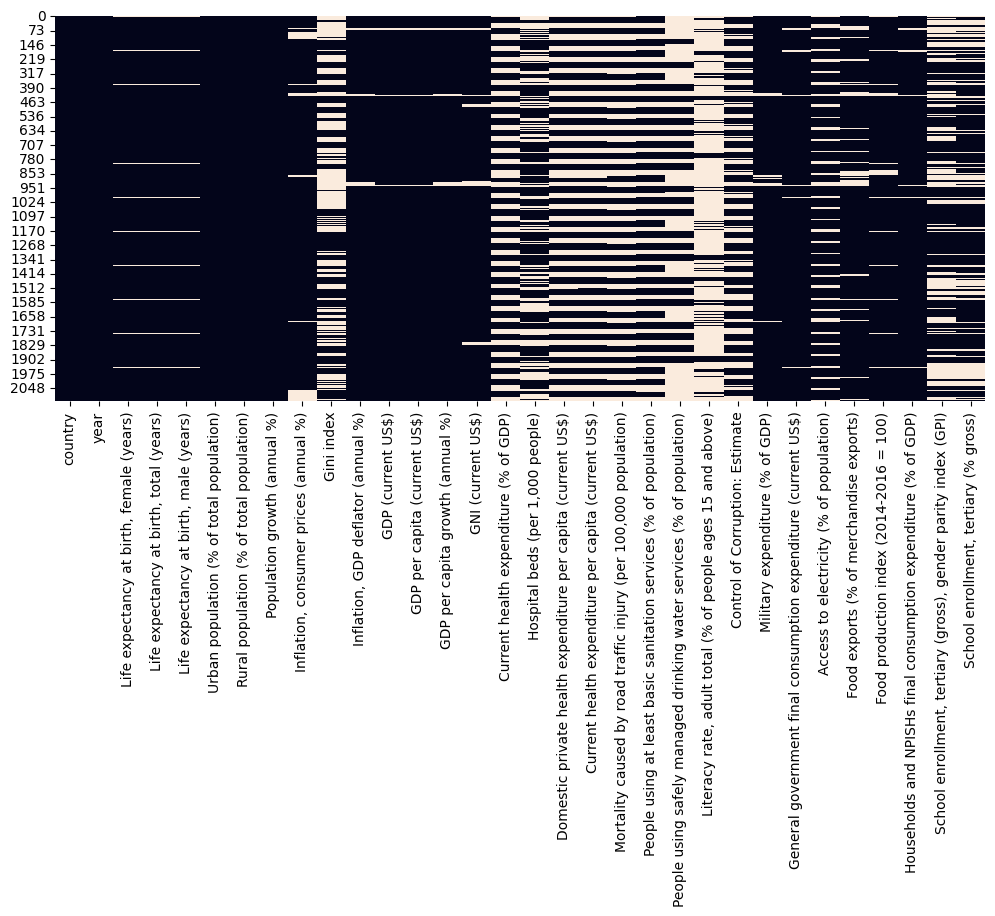

In [40]:
# Crear un mapa de calor de los valores faltantes
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

sns.heatmap(df.isnull(), cbar=False)

plt.show()

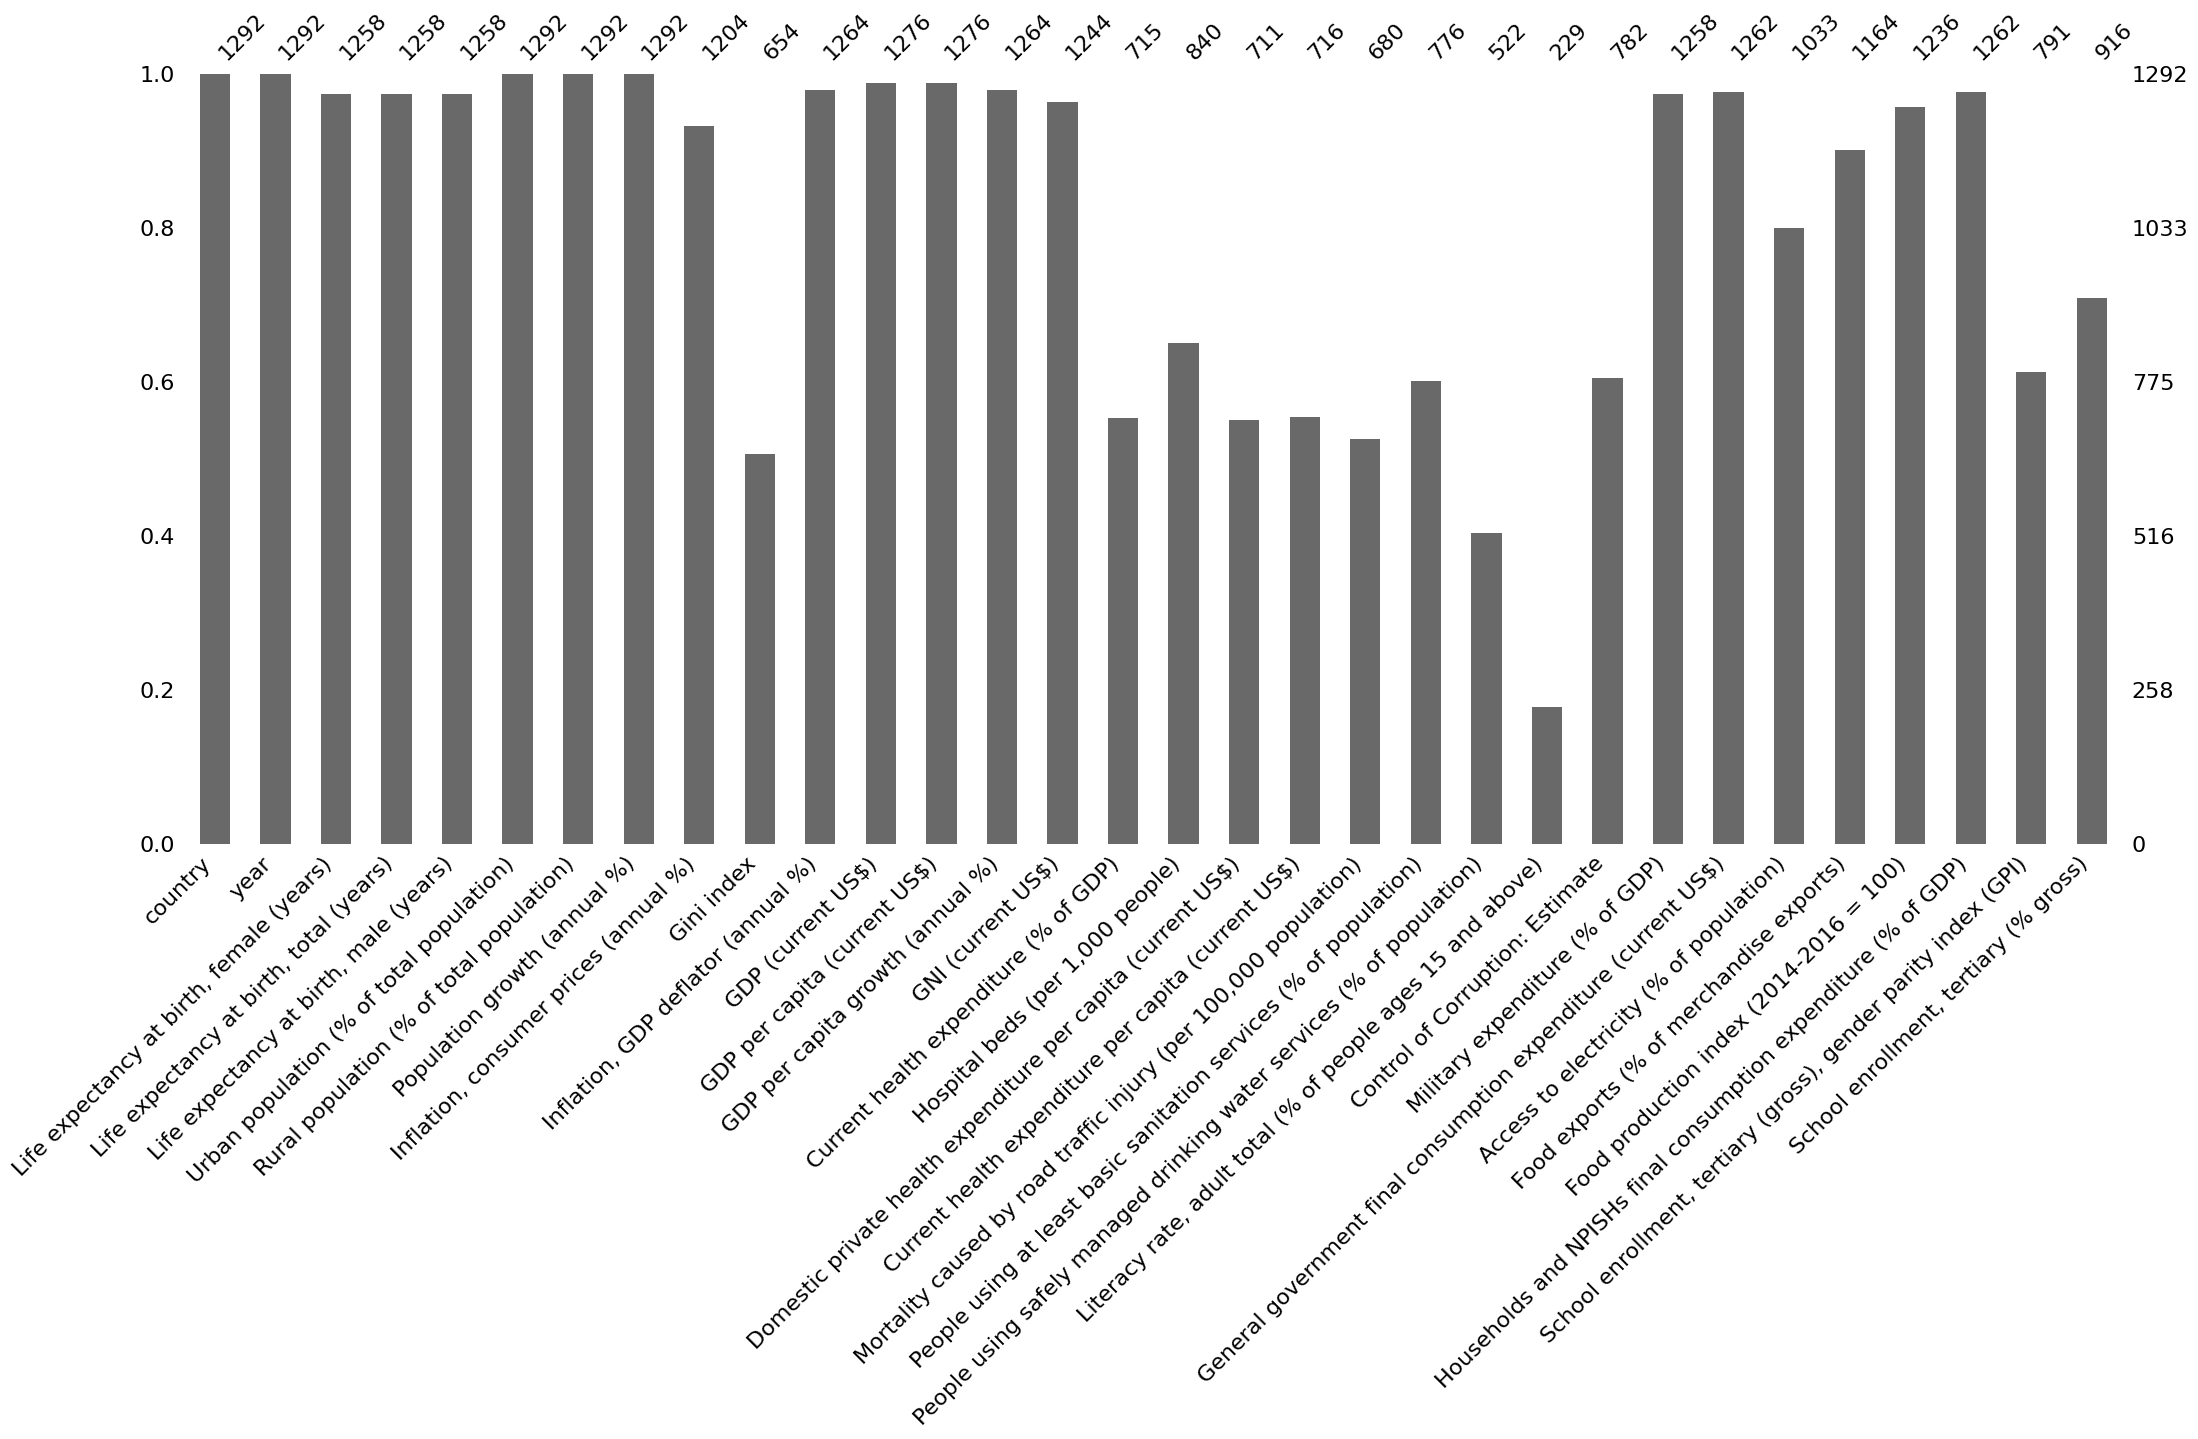

In [41]:
import matplotlib.pyplot as plt
import missingno as msno
# Generarando el gráfico
plt.figure(figsize=(10, 8)) 
msno.bar(df)
# Mostrar el gráfico
plt.show()

### Eliminar columna con más del 30% de datos faltantes

In [42]:
# Columnas a eliminar
drop_columns = [
                'Gini index',
                'Current health expenditure (% of GDP)',
                'Hospital beds (per 1,000 people)',
                'Domestic private health expenditure per capita (current US$)',
                'Current health expenditure per capita (current US$)',
                'Mortality caused by road traffic injury (per 100,000 population)',
                'People using at least basic sanitation services (% of population)',
                'People using safely managed drinking water services (% of population)',
                'Literacy rate, adult total (% of people ages 15 and above)',
                'Control of Corruption: Estimate',
                'School enrollment, tertiary (gross), gender parity index (GPI)'
            ]

In [43]:
df.drop(drop_columns, axis = 'columns', inplace=True)

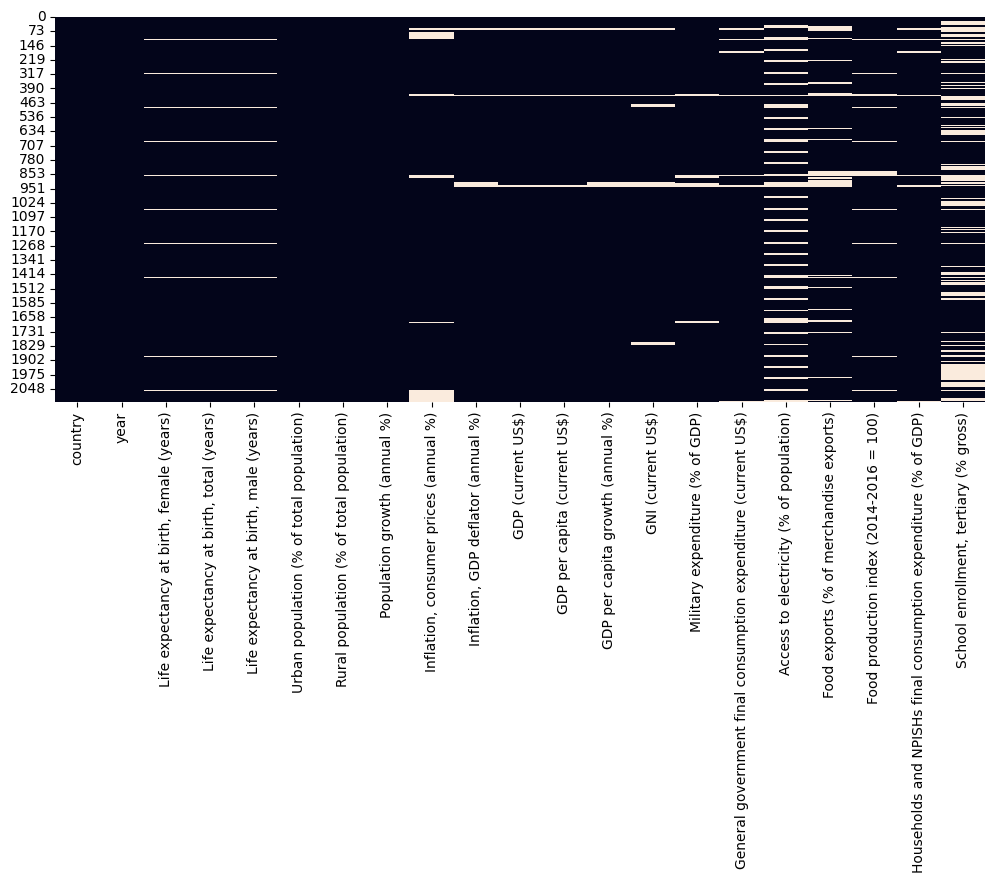

In [44]:
# Verificar  Datos faltantes
plt.figure(figsize=(12, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

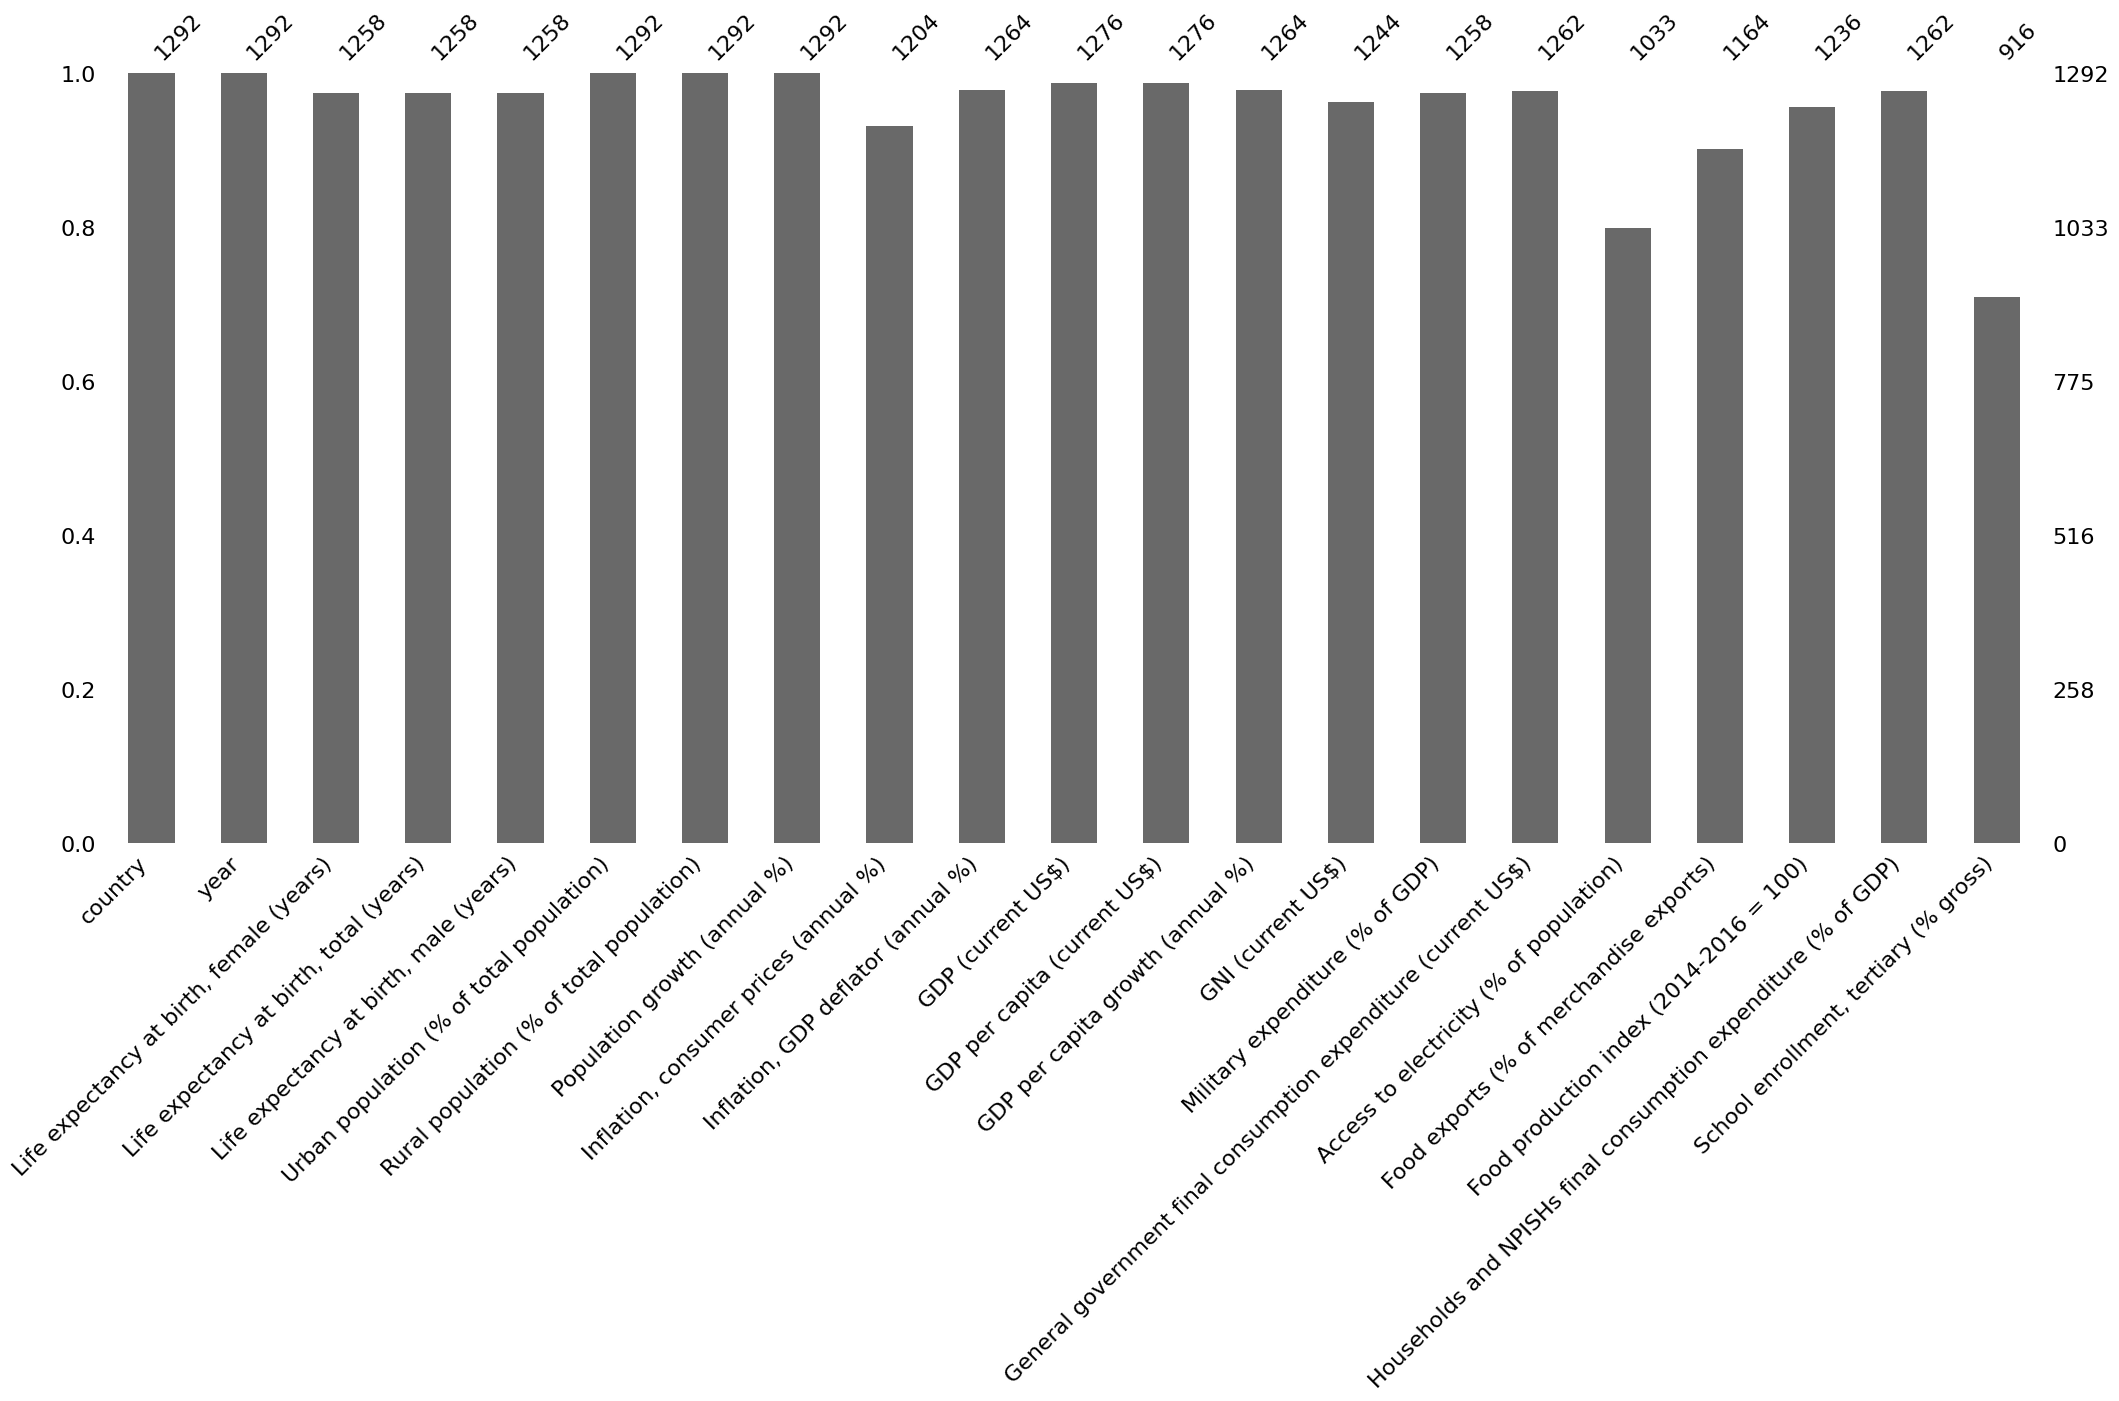

In [45]:
# Generarando el gráfico
plt.figure(figsize=(10, 8)) 
msno.bar(df)
# Mostrar el gráfico
plt.show()

In [46]:
# Verificar duplicados en el DataFrame
duplicates = df.duplicated()
# Contar el número de duplicados
num_duplicates = duplicates.sum()
# Imprimir los resultados
if num_duplicates > 0:
    print("Se encontraron duplicados en el DataFrame.")
    print("Número total de duplicados:", num_duplicates)
else:
    print("No se encontraron duplicados en el DataFrame.")

No se encontraron duplicados en el DataFrame.


In [47]:
print("Valores nulos en porcentaje")
print('*'*100)
# Valores Nulos
df.isnull().sum()*100/df.shape[0]

Valores nulos en porcentaje
****************************************************************************************************


country                                                            0.000000
year                                                               0.000000
Life expectancy at birth, female (years)                           2.631579
Life expectancy at birth, total (years)                            2.631579
Life expectancy at birth, male (years)                             2.631579
Urban population (% of total population)                           0.000000
Rural population (% of total population)                           0.000000
Population growth (annual %)                                       0.000000
Inflation, consumer prices (annual %)                              6.811146
Inflation, GDP deflator (annual %)                                 2.167183
GDP (current US$)                                                  1.238390
GDP per capita (current US$)                                       1.238390
GDP per capita growth (annual %)                                   2.167183
GNI (current

In [49]:
# Guardar el DataFrame en un archivo CSV con codificación UTF-8
df.to_csv('datasets/indicadores_EVN.csv', encoding='utf-8', index=False)

In [53]:
countries_df.to_csv('datasets/contries_EVN.csv', encoding='utf-8', index=False)